# Lab 4 - part2
### Edge Detection

https://github.com/scikit-image/scikit-image/blob/master/skimage/filters/edges.py

http://scikit-image.org/docs/0.11.x/auto_examples/plot_edge_filter.html

http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html



In [43]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
'''
1. Built-in Sobel, Prewill, Roberts, Canny
2. Custom Sobel (V-H-Both)
3. Custom LoG
'''

'\n1. Built-in Sobel, Prewill, Roberts, Canny\n2. Custom Sobel (V-H-Both)\n3. Custom LoG\n'

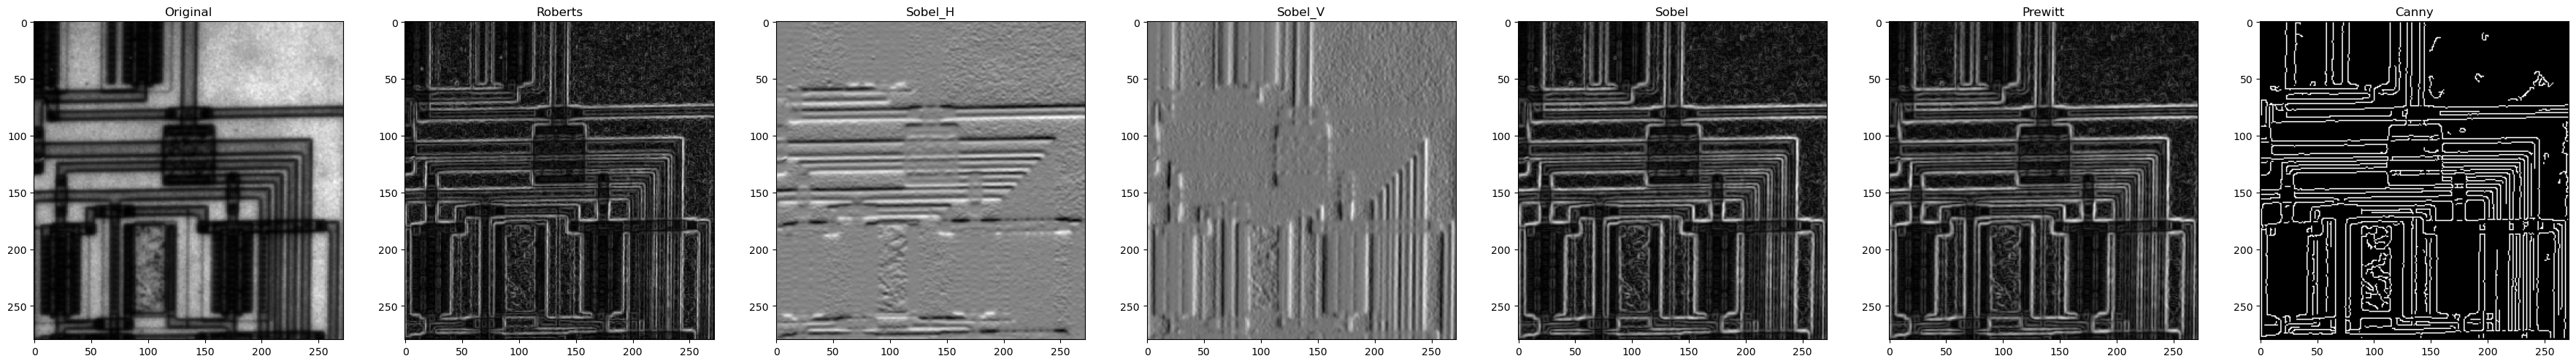

In [45]:
# 1. Built-in Sobel, Prewitt, Roberts, Canny

img = io.imread('circuit.tif',as_gray=True)
edge_roberts = roberts(img)

edge_sobel_h = sobel(img, axis=0)  # horizontal edges
edge_sobel_v = sobel(img, axis=1)  # vertical edges
edge_sobel = sobel(img)            
edge_pre_witt = prewitt(img)
edge_Canny = canny(img,sigma=1)

show_images([img, edge_roberts, edge_sobel_h, edge_sobel_v, edge_sobel, edge_pre_witt, edge_Canny], ['Original', 'Roberts', 'Sobel_H', 'Sobel_V', 'Sobel', 'Prewitt', 'Canny'])




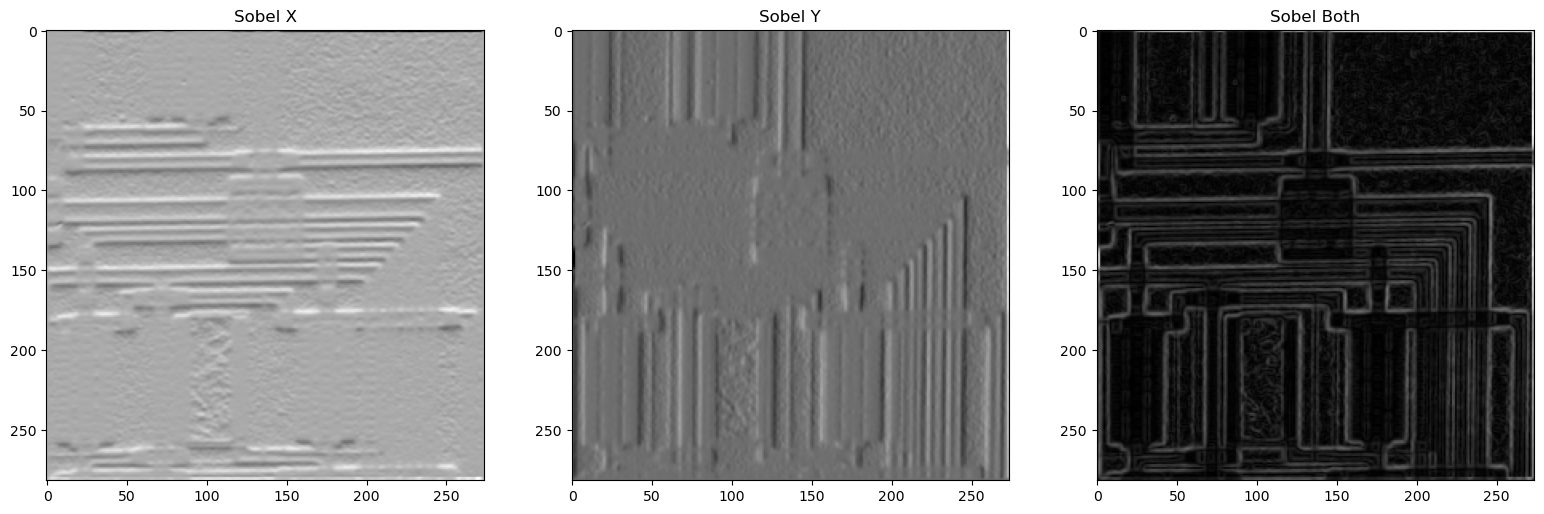

In [46]:

from scipy.ndimage import convolve


def custom_sobel(image, direction='both', thres=0):

    hx = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
    hy = np.array([[-1,  0,  1],
                   [-2,  0,  2],
                   [-1,  0,  1]])

   
    img_x = convolve2d(image, hx)
    img_y = convolve2d(image, hy)

  
    if direction == 'horizontal':
        edge = np.abs(img_x)
    elif direction == 'vertical':
        edge = np.abs(img_y)
    else:  
        edge = np.sqrt(img_x**2 + img_y**2)


    edge_thresh = edge > thres

    show_images([img_x, img_y, edge], ['Sobel X', 'Sobel Y', 'Sobel Both'])

    return edge, edge_thresh

img = io.imread('circuit.tif',as_gray=True)
edge, edge_thresh = custom_sobel(img, direction='both', thres=20)


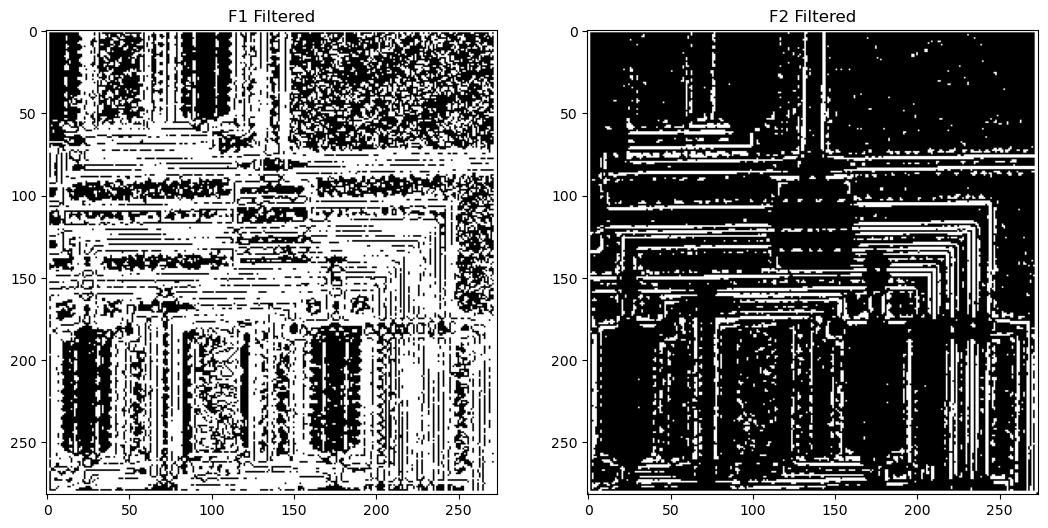

In [47]:
filtered_img = gaussian(img, sigma=1)

F1 = np.array([[-1, -1, -1],
               [-1,  8, -1],
               [-1, -1, -1]])
F2 = np.array([[0,  1, 0],
               [1, -4, 1],
               [0,  1, 0]])


filtered_F1 = convolve2d(filtered_img, F1)
filtered_F2 = convolve2d(filtered_img, F2)
thres = 0.03  

edge_F1 = np.abs(filtered_F1) > thres
edge_F2 = np.abs(filtered_F2) > thres

show_images([edge_F1, edge_F2], ['F1 Filtered', 'F2 Filtered'])



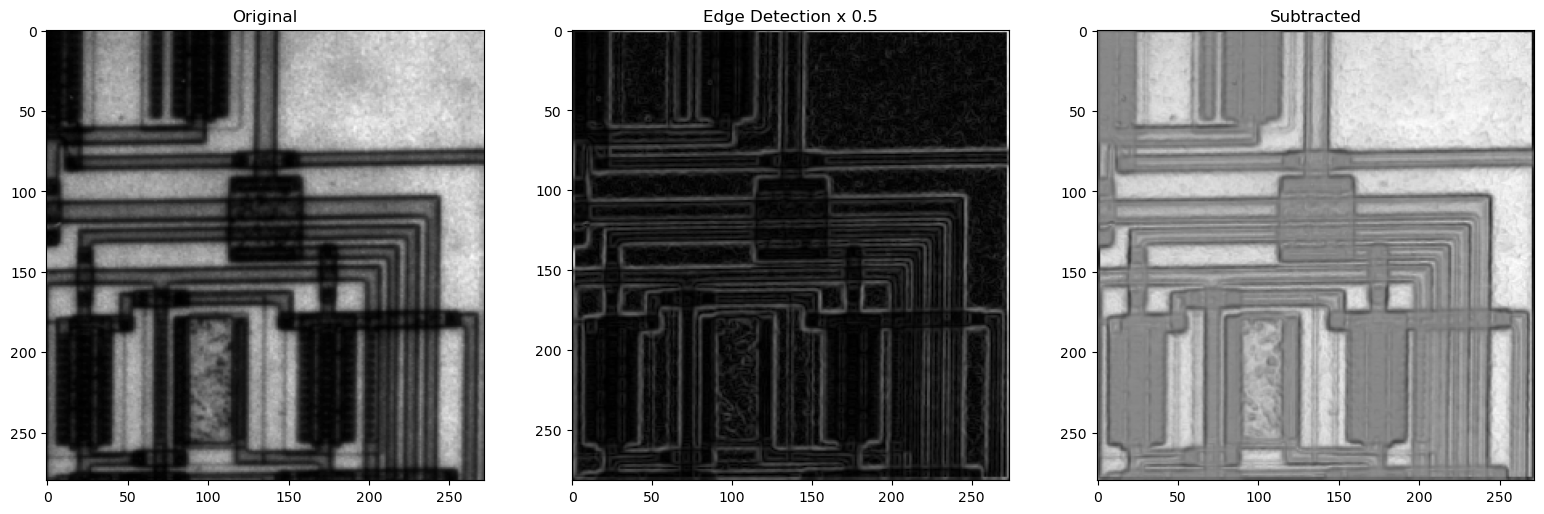

In [ ]:
from skimage.transform import resize

'''
Optional
1-Make edge detection
2-Multiply by factor < 1
3-Subtract (Orginal Image) - (Edge Detection Image)'''

edge_detection = edge 

factor = 0.5
edge_detection_scaled = edge_detection * factor

img_float = img.astype(float)
img_float = img_float 


edge_detection_scaled_resized = resize(edge_detection_scaled, img_float.shape, preserve_range=True, anti_aliasing=True)
result = img_float - edge_detection_scaled_resized

show_images([img, edge_detection_scaled, result], ['Original', 'Edge Detection x 0.5', 'Subtracted'])
